In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Imputer
from sklearn.ensemble.partial_dependence import plot_partial_dependence

In [2]:
train_data_all = pd.read_csv("housing_data_TRAIN.csv")
train_data=train_data_all.select_dtypes(exclude=['object'])


In [3]:
#X_train.info()
cols_with_null = [col for col in train_data.isnull().any().index if train_data.isnull().any()[col]]
#cols_with_null2 = [col for col in train_data if train_data[col].isnull().any()]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop("SalePrice", axis=1), 
                                                        train_data['SalePrice'], test_size=0.33, 
                                                        random_state=42)

X_train_dropnulls = X_train.drop(cols_with_null, axis=1)
X_test_dropnulls = X_test.drop(cols_with_null, axis=1)

my_imputer = Imputer()
X_train_imputed = pd.DataFrame(my_imputer.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_imputed = pd.DataFrame(my_imputer.transform(X_test),index=X_test.index, columns=X_test.columns)



In [5]:
data_to_use = X_train_imputed
gbr = GradientBoostingRegressor()
gbr.fit(data_to_use, y_train)
predicted = gbr.predict(X_test_imputed)
mae_imputed = mean_absolute_error(y_test, predicted)
mae_imputed

18057.600158756271

In [102]:
max_leaf_results=results

In [27]:
data_to_use = X_train_imputed
lr_results = []
#for max_leaves in [5,10,20,50,100,200,500,1000,2000,5000,10000]:
#for lr in [.01,.02, .04, .06, .1, .2]:
lr = .1
gbr_tuned = GradientBoostingRegressor(max_leaf_nodes=10,learning_rate=.1)
gbr_tuned.fit(data_to_use, y_train) 
predicted = gbr_tuned.predict(X_test_imputed)
mae_imputed = mean_absolute_error(y_test, predicted)
lr_results.append([lr, mae_imputed])
mae_imputed
#print(lr_results)

17186.357470274175

In [74]:
pd.Series(X_train_imputed.columns, index=range(0,len(X_train_imputed.columns)))
#list(pd.Series(X_train_imputed.columns).iloc[[3,6,17]])


0                Id
1        MSSubClass
2       LotFrontage
3           LotArea
4       OverallQual
5       OverallCond
6         YearBuilt
7      YearRemodAdd
8        MasVnrArea
9        BsmtFinSF1
10       BsmtFinSF2
11        BsmtUnfSF
12      TotalBsmtSF
13         1stFlrSF
14         2ndFlrSF
15     LowQualFinSF
16        GrLivArea
17     BsmtFullBath
18     BsmtHalfBath
19         FullBath
20         HalfBath
21     BedroomAbvGr
22     KitchenAbvGr
23     TotRmsAbvGrd
24       Fireplaces
25      GarageYrBlt
26       GarageCars
27       GarageArea
28       WoodDeckSF
29      OpenPorchSF
30    EnclosedPorch
31        3SsnPorch
32      ScreenPorch
33         PoolArea
34          MiscVal
35           MoSold
36           YrSold
dtype: object

(<matplotlib.figure.Figure at 0xc718ef0>,
  <matplotlib.axes._subplots.AxesSubplot at 0xc898dd8>])

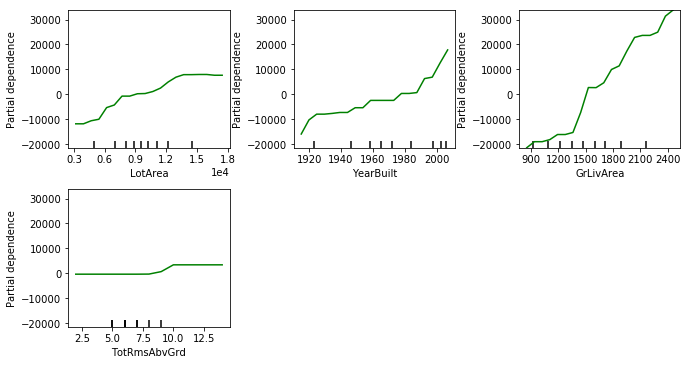

In [76]:
feature_columns=[3,6,16,23]
feature_names=list(pd.Series(X_train_imputed.columns))
%matplotlib inline
plot_partial_dependence(gbr_tuned, features=feature_columns, feature_names=feature_names, X=X_train_imputed, grid_resolution=20, figsize=(10,8))

In [84]:
# Compare to a RandomForest
rf_regressor = RandomForestRegressor()
# Fit with dropnulls
rf_regressor.fit(X_train_imputed, y_train)
predicted = rf_regressor.predict(X_test_imputed)
mae_dropnulls = mean_absolute_error(y_test, predicted)
mae_dropnulls

18854.311825726141

MAE dropping columns with nulls:  19395.9226141
MAE imputing values for fields with nulls:  18751.5514523
MAE with imputed values and _was_null column:  18989.8529046
